In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from Trainer import Trainer

from WaveDataset import WaveDataset

from torch.utils.data.dataloader import DataLoader

# torch.manual_seed(1337)

# train_size = int(0.9*len(mydataset)) 
# val_size = int(0.1*len(mydataset)) 
# train_dataset,val_dataset=torch.utils.data.random_split(mydataset,[train_size,val_size])

# train_data = DataLoader(train_dataset,batch_size=3,shuffle=False)
# val_data = DataLoader(val_dataset, batch_size=3,shuffle=False)

In [2]:
# # from Trainer import Trainer
# from GPTLanguageModel import GPTLanguageModel
# # model=Trainer()
# model = GPTLanguageModel(head_size=5,vocab_size=44,n_embd=5,block_size=4,n_head=1,n_layer=6,dropout=0.2)
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# m = model.to(device)
# # print the number of parameters in the model
# print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

In [3]:
from Trainer import Trainer
from WaveModel import WaveModel
# block_size = 512

mydataset = WaveDataset('full',max_length=80,max_mics=2)
# M,N,n_embd,n_hidden,n_head,n_layer,dropout=0.2
model = WaveModel(mic_num=2,source_num=1,tot_timesteps=80,n_embd=80,n_hidden=120,n_head=8,n_layer=4,dropout=0.2)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
m=model.to(device)
train=Trainer(model,mydataset,batch_size=128,device=device)
train.to('cpu')

print('device : ', device)

Initialized dataset with 10 examples


TypeError: Trainer.__init__() got an unexpected keyword argument 'eval_iters'

In [3]:
train.model.train()
train.optimization(epochs=100,eval_interval=2,lr=1e-3,loadingbar=False)

step 0: train loss 0.4634, val loss 0.4663


100%|██████████| 141/141 [00:05<00:00, 27.29it/s]


step 2: train loss 0.2494, val loss 0.2529


100%|██████████| 141/141 [00:05<00:00, 27.73it/s]


step 4: train loss 0.1902, val loss 0.1981


100%|██████████| 141/141 [00:05<00:00, 27.46it/s]


step 6: train loss 0.1382, val loss 0.1426


100%|██████████| 141/141 [00:05<00:00, 27.62it/s]


step 8: train loss 0.1238, val loss 0.1297


100%|██████████| 141/141 [00:05<00:00, 27.47it/s]


step 10: train loss 0.1108, val loss 0.1185


100%|██████████| 141/141 [00:05<00:00, 27.11it/s]


step 12: train loss 0.1055, val loss 0.1138


100%|██████████| 141/141 [00:05<00:00, 27.37it/s]


step 14: train loss 0.1062, val loss 0.1153


100%|██████████| 141/141 [00:05<00:00, 27.49it/s]


step 16: train loss 0.1039, val loss 0.1144


100%|██████████| 141/141 [00:05<00:00, 27.61it/s]


step 18: train loss 0.1006, val loss 0.1116


100%|██████████| 141/141 [00:05<00:00, 27.65it/s]


step 20: train loss 0.0962, val loss 0.1114


100%|██████████| 141/141 [00:05<00:00, 27.88it/s]


step 22: train loss 0.0936, val loss 0.1115


 45%|████▌     | 64/141 [00:02<00:02, 27.40it/s]


KeyboardInterrupt: 

HYUCK TARGET : torch.Size([1, 2])
torch.Size([3, 6, 160])


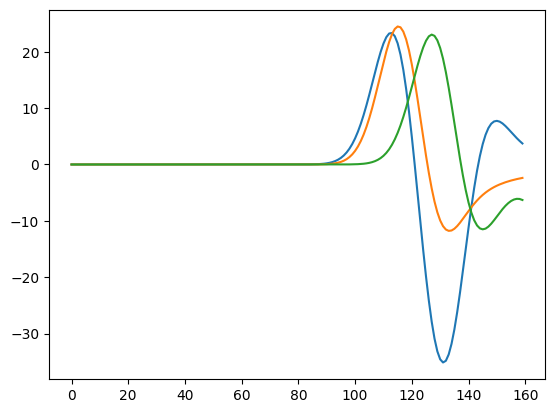

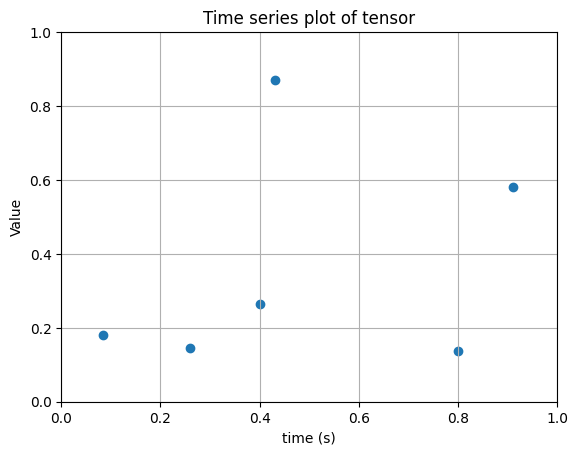

In [3]:
# Visualize dataset data
num=3
recordings = mydataset[num][1] # (3,M,T)
print(recordings.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(3):
    mic_recording = recordings[0,i,:].numpy()

    
    x = range(len(mic_recording))
    ax.plot(x, mic_recording)

fig, ax = plt.subplots()

plt.scatter(recordings[1,:,0],recordings[2,:,0])
plt.xlim([0, 1])  # setting x limit
plt.ylim([0, 1])  # setting y limit

ax.set(xlabel='time (s)', ylabel='Value', title='Time series plot of tensor')
ax.grid()
plt.show()